# Image Classification using Convolutional Neural Networks (CNN) - X-ray Images
**Author**: Group 6 - Angela Nyaga, 
                      Sophy Owuor and 
                      Rowlandson Kariuki
***

## Overview

In this project, we will utilize a pre-trained CNN model to predict the classification of X-ray images.

## Business Problem

The medical dataset comprises X-ray images of pediatric patients, indicating the presence or absence of pneumonia. Our goal is to develop a model capable of determining whether a given patient has pneumonia based on a chest X-ray image. Utilizing image analysis, classification techniques, and convolutional neural networks (CNNs), our objective is to accurately identify X-rays with a pneumonia diagnosis. Considering the limited availability of radiologists at any given time, the aspiration is that a model trained on CNNs can correctly interpret and analyze X-rays, even for those lacking specialized human expertise.

## Setup and Preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

# Use TensorFlow's Keras
import tensorflow as tf
from sklearn import metrics
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

Examining our directory structure and establishing the necessary file paths for upcoming tasks

from sklearn.model_selection import train_test_split

This is how data was split into train, test and validation sets. We could not code the below on this notebook due to the massive size of data involved
In our case:
70% of the data is allocated to the training set (X_train, y_train).
15% is allocated to the validation set (X_val, y_val).
15% is allocated to the test set (X_test, y_test).
# Splitting normal data
normal_train, normal_temp = train_test_split(normal_files, test_size=0.3, random_state=42)
normal_val, normal_test = train_test_split(normal_temp, test_size=0.5, random_state=42)

# Splitting pneumonia data
pneumonia_train, pneumonia_temp = train_test_split(pneumonia_files, test_size=0.3, random_state=42)
pneumonia_val, pneumonia_test = train_test_split(pneumonia_temp, test_size=0.5, random_state=42)

In [2]:
# Define the base directory path for chest X-ray images
images_home = "../xray-classification/chest_xray_images/"

# Define directory paths for training, testing, and validation sets
train_files = images_home + "train/"
test_files = images_home + "test/"
val_files = images_home + "val/"

In [3]:
# Print the list of filenames in the training directory
print(os.listdir(train_files))

['NORMAL', 'PNEUMONIA']


In [4]:
# Define directory paths for normal and pneumonia training images
train_norm = train_files+"NORMAL/"
train_sick = train_files+"PNEUMONIA/"

In [5]:
# Print the number of images in the normal and pneumonia training directories
print(len(os.listdir(train_norm)))
print(len(os.listdir(train_sick)))

1042
3576


With 1042 normal images and 3576 pneumonia images indicating a class imbalance that will be dealt with subsequently.

Text(0.5, 1.0, 'Pneumonia')

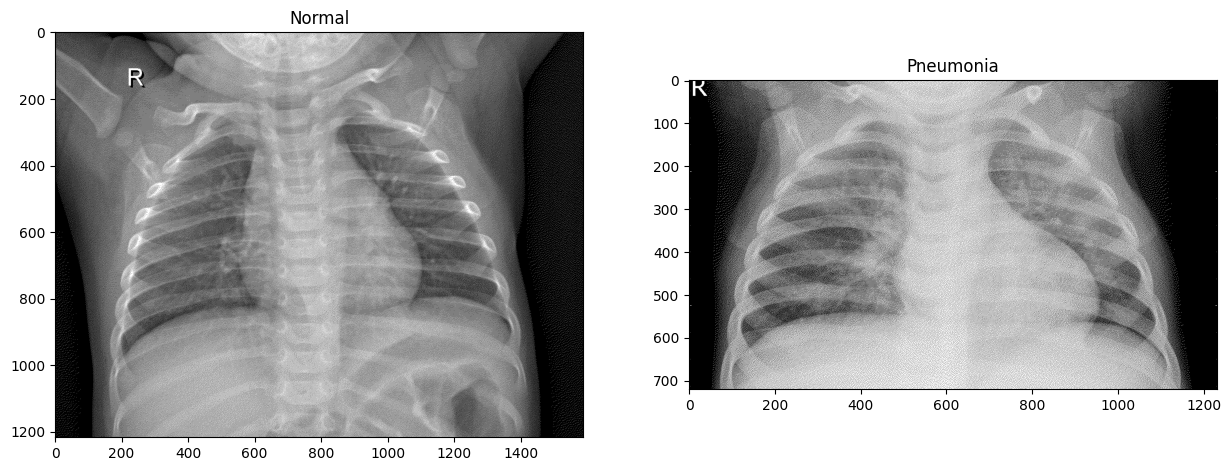

In [6]:
# Select the 41st image from the normal and pneumonia training directories
norm_pic_file = os.listdir(train_norm)[40]
sick_pic_file = os.listdir(train_sick)[40]

# Build full file paths for the selected images
norm_pic_full_filename = train_norm + norm_pic_file
sick_pic_full_filename = train_sick + sick_pic_file

# Load and convert the selected images to binary (black and white)
pic_norm = Image.open(norm_pic_full_filename).convert('1')
pic_sick = Image.open(sick_pic_full_filename).convert('1')

# Create a figure for side-by-side visualization of the normal and pneumonia images
f = plt.figure(figsize=(15,15))
a_norm = f.add_subplot(1,2,1)
img_plot = plt.imshow(pic_norm)
a_norm.set_title("Normal")

a_sick = f.add_subplot(1,2,2)
img_plot = plt.imshow(pic_sick)
a_sick.set_title("Pneumonia")

There exists a disparity in the sizes of the images, indicating a potential imbalance. standardization is required.